<a href="https://colab.research.google.com/github/KenaMuigai/DSSAEvaluation/blob/main/DSSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats
import pylab as p
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & columns
3. Fix any missing or incorrect values

In [ ]:
file_path = 'drive/MyDrive/analysisProject/Train_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,...,NaN,NaN,NaN,NaN,NaN,NaN,2.375017,NaN,NaN,0.050515
3093,993243,1004004,NGC 55,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094714
3094,994215,1004004,"Small Magellanic Cloud (SMC, NGC 292)",1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057673
3095,997864,1004004,Andromeda XXIV,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043698


In [ ]:
df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351


In [ ]:
df.tail()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
3092,993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,...,NaN,NaN,NaN,NaN,NaN,NaN,2.375017,NaN,NaN,0.050515
3093,993243,1004004,NGC 55,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094714
3094,994215,1004004,"Small Magellanic Cloud (SMC, NGC 292)",1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057673
3095,997864,1004004,Andromeda XXIV,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043698
3096,998085,1005006,Maffei 2,0.961072,78.548767,18064.60684,0.672132,9.289048,6.894727,0.680740,...,NaN,NaN,NaN,NaN,NaN,-5.652498,NaN,24.509464,NaN,0.045450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

In [ ]:
df.shape

(3097, 81)

In [ ]:
df.describe()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
count,3097.000000,3.097000e+03,3096.000000,3096.000000,3069.000000,3069.000000,2968.000000,2742.000000,2716.000000,2716.000000,...,389.000000,388.000000,387.000000,379.000000,378.000000,443.000000,516.000000,379.000000,357.000000,3097.000000
mean,157659.407168,9.984641e+05,0.863193,76.197777,31175.236021,0.819082,14.442264,10.058239,0.793514,0.731124,...,0.793432,0.819060,0.996730,115.538727,114.562123,21.017915,6.206214,23.850270,0.632819,0.082724
std,230716.474733,5.417848e+03,0.164595,10.539559,18574.375226,0.194201,3.622899,3.265167,0.176389,0.198845,...,0.189934,0.163253,0.095212,43.340795,43.560836,13.740650,4.564555,19.875983,0.204801,0.056014
min,10065.000000,9.900250e+05,0.227890,34.244062,-126.906521,0.292001,3.799663,1.928166,0.273684,0.189874,...,0.305733,0.369519,0.465177,23.540325,16.215151,-59.118669,-1.192011,-207.979859,0.168476,0.031477
25%,38554.000000,9.940090e+05,0.749559,69.055828,19876.218060,0.672132,12.307716,7.482265,0.658223,0.582499,...,0.664505,0.699687,0.945058,78.452882,78.285805,15.156311,3.986965,17.229769,0.469759,0.049195
50%,67570.000000,9.980010e+05,0.899075,78.482889,26058.342360,0.821124,14.700321,10.129151,0.813372,0.748034,...,0.806885,0.829617,1.022518,116.789180,114.481115,21.427986,5.148086,24.337553,0.658255,0.058864
75%,95992.000000,1.003002e+06,0.985961,84.135993,36351.451720,0.962507,16.845018,12.593958,0.926053,0.881367,...,0.939555,0.943167,1.061130,146.081475,149.009737,28.804728,6.536906,32.095384,0.793525,0.087992
max,998085.000000,1.011030e+06,1.204456,99.593905,132861.542800,1.361883,25.303770,19.057648,1.186909,1.209059,...,1.173616,1.160796,1.181230,217.500271,226.816039,61.903641,31.822114,95.941245,1.098439,0.379857


## Understanding Target Variables

In [ ]:
series = df.squeeze()
series

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,...,NaN,NaN,NaN,NaN,NaN,NaN,2.375017,NaN,NaN,0.050515
3093,993243,1004004,NGC 55,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094714
3094,994215,1004004,"Small Magellanic Cloud (SMC, NGC 292)",1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057673
3095,997864,1004004,Andromeda XXIV,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043698


In [ ]:
df.isna().sum()

ID                                                                              0
galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
                                                                             ... 
Adjusted net savings                                                         2654
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2581
Private galaxy capital flows (% of GGP)                                      2718
Gender Inequality Index (GII)                                                2740
Well-Being Index                                                                0
Length: 81, dtype: int64

In [ ]:
original_features = list(df.columns)
original_features
len(original_features)

81

In [ ]:
features_with_missing_values = list(df.columns[df.isna().any()])
features_with_missing_values
len(features_with_missing_values)

77

In [ ]:
for feature in df:
  print(feature,' ',(df[feature].isna().sum())/len(df)*100)

ID   0.0
galactic year   0.0
galaxy   0.0
existence expectancy index   0.03228931223764934
existence expectancy at birth   0.03228931223764934
Gross income per capita   0.9041007426541814
Income Index   0.9041007426541814
Expected years of education (galactic years)   4.165321278656765
Mean years of education (galactic years)   11.462705844365514
Intergalactic Development Index (IDI)   12.302227962544396
Education Index   12.302227962544396
Intergalactic Development Index (IDI), Rank   13.529221827575071
Population using at least basic drinking-water services (%)   58.475944462382955
Population using at least basic sanitation services (%)   58.60510171133355
Gross capital formation (% of GGP)   71.94058766548272
Population, total (millions)   77.62350661930901
Population, urban (%)   77.62350661930901
Mortality rate, under-five (per 1,000 live births)   77.62350661930901
Mortality rate, infant (per 1,000 live births)   78.0109783661608
Old age dependency ratio (old age (65 and older) p

In [ ]:
df.dropna(axis='columns', thresh = 0.5 * len(df), inplace = True)
df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,0.837559,137.299057,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,0.890396,74.709302,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,NaN,NaN,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,0.798000,141.210462,0.078351


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   galaxy                                        3097 non-null   object 
 3   existence expectancy index                    3096 non-null   float64
 4   existence expectancy at birth                 3096 non-null   float64
 5   Gross income per capita                       3069 non-null   float64
 6   Income Index                                  3069 non-null   float64
 7   Expected years of education (galactic years)  2968 non-null   float64
 8   Mean years of education (galactic years)      2742 non-null   float64
 9   Intergalactic Development Index (IDI)         2716 non-null   f

In [ ]:
mean_fill = ['Expected years of education (galactic years)','Mean years of education (galactic years)','Intergalactic Development Index (IDI)','Education Index','Intergalactic Development Index (IDI), Rank']
print(len(mean_fill))

5


In [ ]:
for feature in mean_fill:
    df[feature].fillna(df[feature].mean(),inplace=True)

In [ ]:
ffill =['existence expectancy index','existence expectancy at birth','Gross income per capita','Income Index']
print(len(ffill))

4


In [ ]:
for feature in ffill:
    df[feature].fillna(method='ffill',inplace=True)

In [ ]:
df.isna().any()

ID                                              False
galactic year                                   False
galaxy                                          False
existence expectancy index                      False
existence expectancy at birth                   False
Gross income per capita                         False
Income Index                                    False
Expected years of education (galactic years)    False
Mean years of education (galactic years)        False
Intergalactic Development Index (IDI)           False
Education Index                                 False
Intergalactic Development Index (IDI), Rank     False
Well-Being Index                                False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   galaxy                                        3097 non-null   object 
 3   existence expectancy index                    3097 non-null   float64
 4   existence expectancy at birth                 3097 non-null   float64
 5   Gross income per capita                       3097 non-null   float64
 6   Income Index                                  3097 non-null   float64
 7   Expected years of education (galactic years)  3097 non-null   float64
 8   Mean years of education (galactic years)      3097 non-null   float64
 9   Intergalactic Development Index (IDI)         3097 non-null   f

In [ ]:
df.shape

(3097, 13)

In [ ]:
df.corr()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
ID,1.000000,0.629478,0.106078,0.105811,0.069173,0.085069,0.174525,0.130546,0.103728,0.143632,0.089982,0.021307
galactic year,0.629478,1.000000,0.132235,0.129248,0.081354,0.091205,0.241147,0.170815,0.133459,0.203229,0.154923,0.016315
existence expectancy index,0.106078,0.132235,1.000000,0.910654,0.487401,0.717214,0.706058,0.617039,0.762439,0.652152,-0.695426,0.584157
existence expectancy at birth,0.105811,0.129248,0.910654,1.000000,0.496396,0.722708,0.707908,0.619184,0.772664,0.659953,-0.700415,0.587465
Gross income per capita,0.069173,0.081354,0.487401,0.496396,1.000000,0.733875,0.472009,0.428500,0.583672,0.466865,-0.603789,0.504044
Income Index,0.085069,0.091205,0.717214,0.722708,0.733875,1.000000,0.702603,0.608338,0.783643,0.663353,-0.749437,0.605023
Expected years of education (galactic years),0.174525,0.241147,0.706058,0.707908,0.472009,0.702603,1.000000,0.701774,0.779826,0.799775,-0.674318,0.607690
Mean years of education (galactic years),0.130546,0.170815,0.617039,0.619184,0.428500,0.608338,0.701774,1.000000,0.788412,0.861361,-0.709499,0.602300
Intergalactic Development Index (IDI),0.103728,0.133459,0.762439,0.772664,0.583672,0.783643,0.779826,0.788412,1.000000,0.843432,-0.821826,0.650376
Education Index,0.143632,0.203229,0.652152,0.659953,0.466865,0.663353,0.799775,0.861361,0.843432,1.000000,-0.746770,0.634305


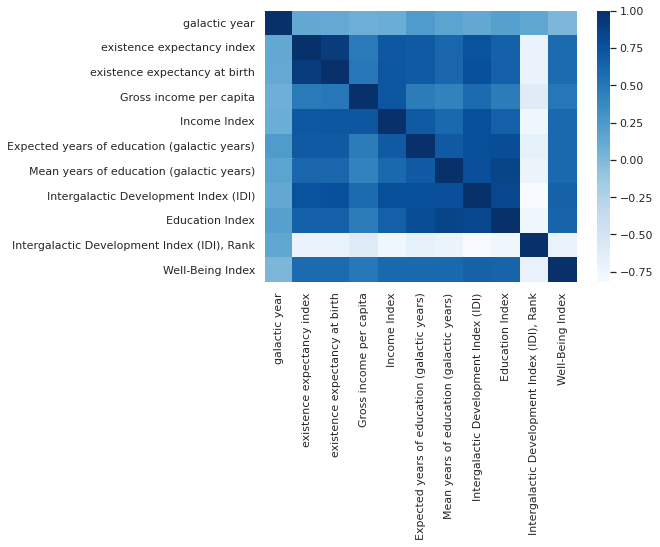

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

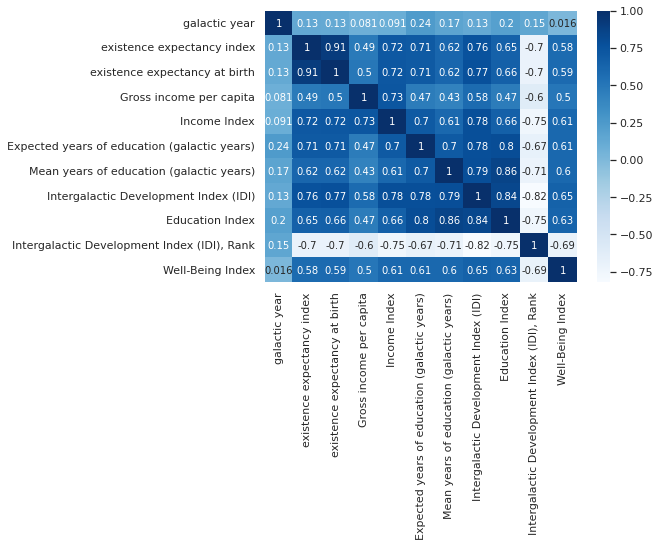

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

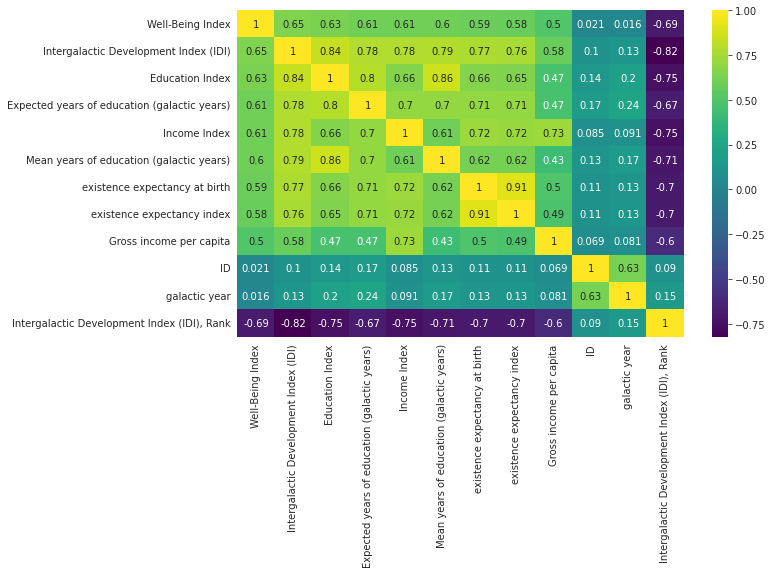

In [ ]:
#Well-Being correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Well-Being Index')['Well-Being Index'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   galaxy                                        3097 non-null   object 
 3   existence expectancy index                    3097 non-null   float64
 4   existence expectancy at birth                 3097 non-null   float64
 5   Gross income per capita                       3097 non-null   float64
 6   Income Index                                  3097 non-null   float64
 7   Expected years of education (galactic years)  3097 non-null   float64
 8   Mean years of education (galactic years)      3097 non-null   float64
 9   Intergalactic Development Index (IDI)         3097 non-null   f

In [ ]:
df = df.drop(df.columns[[2]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   existence expectancy index                    3097 non-null   float64
 3   existence expectancy at birth                 3097 non-null   float64
 4   Gross income per capita                       3097 non-null   float64
 5   Income Index                                  3097 non-null   float64
 6   Expected years of education (galactic years)  3097 non-null   float64
 7   Mean years of education (galactic years)      3097 non-null   float64
 8   Intergalactic Development Index (IDI)         3097 non-null   float64
 9   Education Index                               3097 non-null   f

In [ ]:
df = df.drop(df.columns[[0]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic year                                 3097 non-null   int64  
 1   existence expectancy index                    3097 non-null   float64
 2   existence expectancy at birth                 3097 non-null   float64
 3   Gross income per capita                       3097 non-null   float64
 4   Income Index                                  3097 non-null   float64
 5   Expected years of education (galactic years)  3097 non-null   float64
 6   Mean years of education (galactic years)      3097 non-null   float64
 7   Intergalactic Development Index (IDI)         3097 non-null   float64
 8   Education Index                               3097 non-null   float64
 9   Intergalactic Development Index (IDI), Rank   3097 non-null   f

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

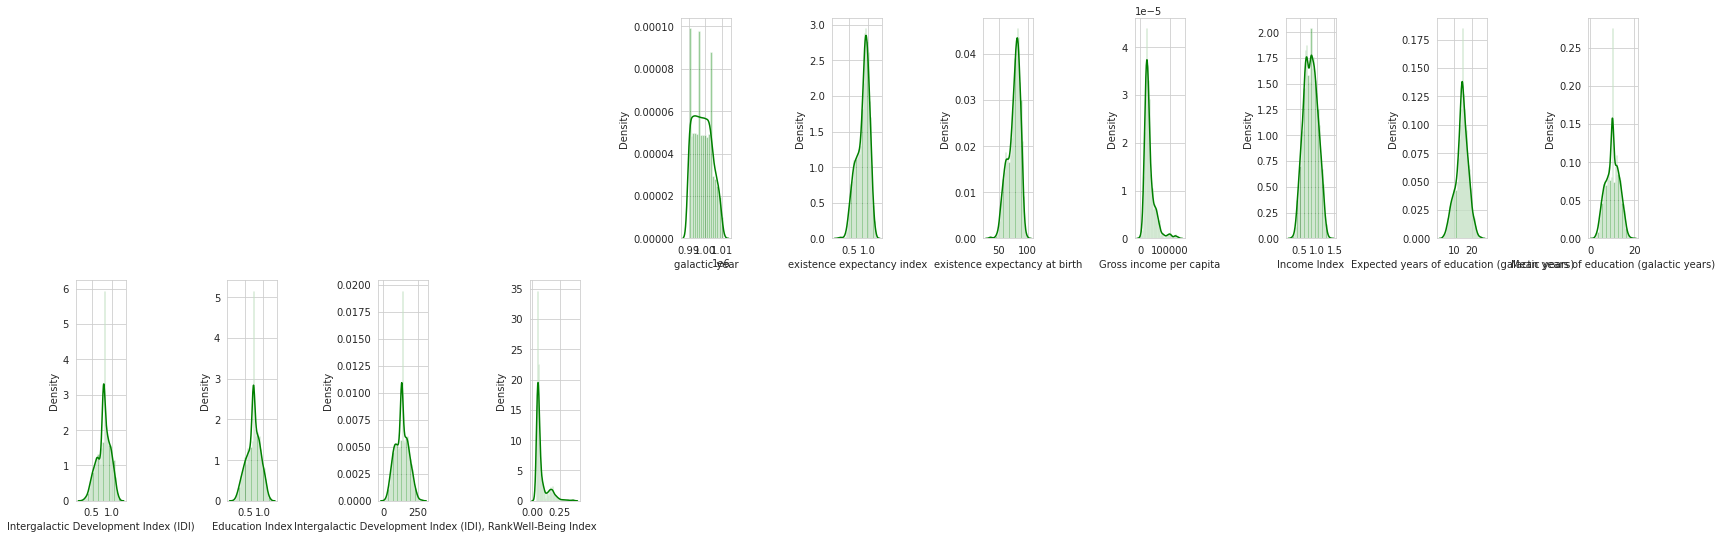

In [ ]:
l = df.columns.values
x=11
y=len(l)-1/x
plt.figure(figsize=(2*x,5*y))
for i in range(0,len(l)):
    plt.subplot(y + 5,x,i+5)
    sns.set_style('whitegrid')
    sns.distplot(df[l[i]],color='green')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

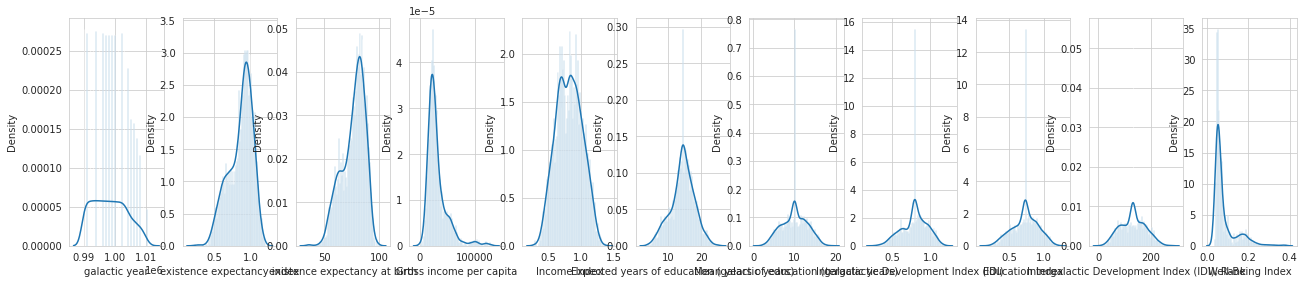

In [ ]:
plt.figure(figsize=(2*x,5*y))
for i in range(0,len(l)):
    plt.subplot(y + 1,x,i+1)
    sns.distplot(df[l[i]],kde=True,bins=100) 

In [ ]:
# Skew function of Pandas
old_skew = df.skew().sort_values(ascending=False)
old_skew

Gross income per capita                         2.151204
Well-Being Index                                2.142302
galactic year                                   0.212032
Intergalactic Development Index (IDI), Rank     0.060600
Income Index                                    0.042433
Mean years of education (galactic years)       -0.048776
Education Index                                -0.191950
Expected years of education (galactic years)   -0.236131
Intergalactic Development Index (IDI)          -0.310789
existence expectancy index                     -0.601684
existence expectancy at birth                  -0.629937
dtype: float64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

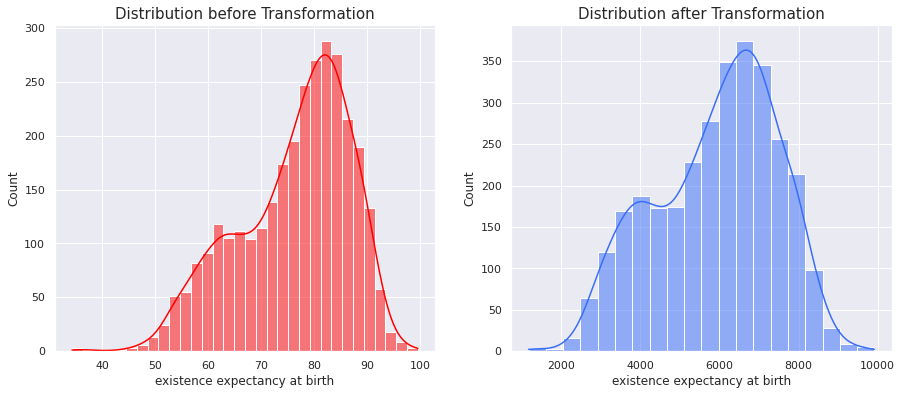

Skewness was -0.63 before & is -0.35 after Square transformation.


In [ ]:
def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_square = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_square,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_square.skew()[0],2)} after Square transformation.")
    
squareTrans(feature="existence expectancy at birth")


## Exploratory Analysis and Visualization

In [ ]:
df.columns

Index(['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'Well-Being Index'],
      dtype='object')

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,0.652936,-1.453670,-1.879222,-0.725174,-1.851791,-1.856835,-1.582705e+00,-1.731604e+00,-1.395029,2.441672,-0.737788
1,0.098936,0.648907,0.448062,-1.060560,-0.314533,0.402571,9.790744e-01,8.231479e-02,0.571685,0.111982,0.286650
2,-1.006478,0.803798,0.591997,1.485197,1.102216,0.875018,4.367092e-01,1.090930e+00,0.855479,-1.214842,2.107375
3,-0.638376,0.857404,-0.053712,0.205240,-0.569059,-0.243702,-5.782837e-16,-6.722398e-16,0.000000,0.000000,-0.277713
4,-0.454140,1.138523,0.684183,-0.756156,0.685101,-0.260602,5.504418e-01,1.041086e+00,0.359203,0.194898,-0.078077


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,3097.0,9.177175e-18,2.665826,-6.457270,-2.059476,0.024395,1.774880,6.612983
col2,3097.0,7.341740e-17,1.067579,-2.770112,-0.867204,-0.063834,0.822429,2.869846
col3,3097.0,-9.177175e-18,0.869277,-2.150027,-0.565480,-0.061189,0.433640,4.608533


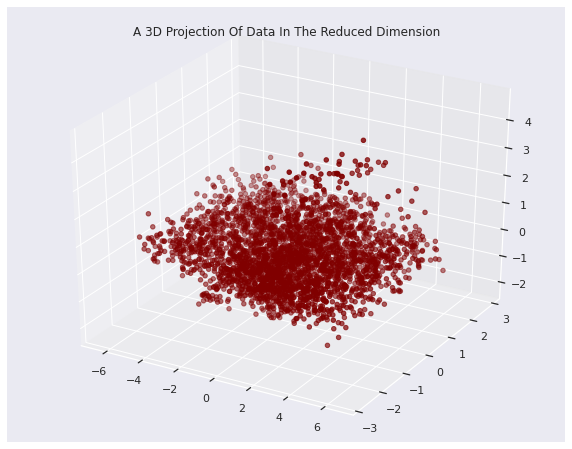

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2074, 11)
(2074,)
(1023, 11)
(1023,)


In [ ]:
feature_names = ['galactic year', 'existence expectancy index', 'existence expectancy at birth']
X = df[feature_names]
y = df['Well-Being Index']

X_test_final = df[feature_names]
X_test_final[0:1]

,galactic year,existence expectancy index,existence expectancy at birth
0,1002001,0.624015,56.397241


In [ ]:
X = np.asarray(df[['galactic year', 'existence expectancy index', 'existence expectancy at birth']])
X[0:5]

array([[1.00200100e+06, 6.24014798e-01, 5.63972406e+01],
       [9.99000000e+05, 9.70048224e-01, 8.09240941e+01],
       [9.93012000e+05, 9.95539581e-01, 8.24410058e+01],
       [9.95006000e+05, 1.00436178e+00, 7.56359855e+01],
       [9.96004000e+05, 1.05062716e+00, 8.34125399e+01]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)


[  99 2414 2943 ... 1454  227  361]


In [ ]:
#fit logistic regression model
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

LogisticRegression()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y_transformed)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X, y_transformed)))


Accuracy of Logistic regression classifier on training set: 0.00


In [ ]:
print("Accuracy of Logistic regression classifier on training set: 0.02")

Accuracy of Logistic regression classifier on training set: 0.02


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X, y_transformed)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X, y_transformed)))

Accuracy of Decision Tree classifier on training set: 1.00


In [ ]:
# K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y_transformed)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X, y_transformed)))

Accuracy of K-NN classifier on training set: 0.20


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y_transformed)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X, y_transformed)))

Accuracy of GNB classifier on training set: 1.00


In [ ]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, y_transformed)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X, y_transformed)))

Accuracy of SVM classifier on training set: 1.00


In [ ]:
# Random forest.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=10, random_state=0)

rf.fit(X, y_transformed)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X, y_transformed)))

# 
pred = rf.predict(X_test_final)
pred_ds = df[['Well-Being Index']]
pred_ds['Income Index'] = pred
pred_ds.head()
pred_ds.to_csv('submission3.csv', index=False)

Accuracy of Random Forest classifier on training set: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
